In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [31]:
save_folder = os.path.join("results","images")

In [32]:
filepath = os.path.join("results","radar_target_recognition_snr_trajectory_nogeometry_avg_fixed.csv")

df = pd.read_csv(filepath)
print(df.head().to_string())
df.head()

                             run_id       experiment_id    status                                                                                            artifact_uri                        start_time                          end_time  accuracy_single  accuracy                                               experiment_name  azimuth_spread    vx  random_seed  time_step_size  elevation_center  MC_Trials  num_points single_method model_choice azimuth_jitter_bounds pitch_range  roll_range  SNR_constraint     TN  azimuth_center noise_method  color geometry yaw_range  elevation_spread fusion_method  n_radars mlflow_track  elevation_jitter_width  azimuth_jitter_width elevation_jitter_bounds tags.mlflow.source.type tags.mlflow.runName tags.mlflow.user    tags.mlflow.source.name                                                                                                                                                                                                                          

run_id       experiment_id    status  \
0  86e0a6e5669941cb82d164e2be16cf10  257744525143318268  FINISHED   
1  21a2cdf3de794c5fbf064b171aa16a27  257744525143318268  FINISHED   
2  bb2e5a621406463191643216d87ff7f9  257744525143318268  FINISHED   
3  2cfe4f65f4e6442ab69f18f8786cf68d  257744525143318268  FINISHED   
4  30359be87370466198744009247d1e52  257744525143318268  FINISHED   

                                        artifact_uri  \
0  file:///scratch/potter.mi/RCS_ATR/mlruns/25774...   
1  file:///scratch/potter.mi/RCS_ATR/mlruns/25774...   
2  file:///scratch/potter.mi/RCS_ATR/mlruns/25774...   
3  file:///scratch/potter.mi/RCS_ATR/mlruns/25774...   
4  file:///scratch/potter.mi/RCS_ATR/mlruns/25774...   

                         start_time                          end_time  \
0  2024-01-25 22:24:51.442000+00:00  2024-01-26 00:29:16.821000+00:00   
1  2024-01-25 22:24:48.958000+00:00  2024-01-26 00:40:07.133000+00:00   
2  2024-01-25 22:24:19.013000+00:00  2024-01-26 00:29:01.079000+00:00   
3  2024-01-25 22:24:18.872000+00:00  2024-01-26 00:28:02.643000+00:00   
4  2024-01-25 22:24:03.528000+00:00  2024-01-25 23:46:54.623000+00:00   

   accuracy_single  accuracy  \
0         0.947129  0.552929   
1         0.687114  0.787429   
2         0.503664  0.629950   
3         0.947129  0.976779   
4         0.666479  0.526436   

                                     experiment_name  azimuth_spread  ...  \
0  radar_target_recognition_snr_trajectory_nogeom...           180.0  ...   
1  radar_target_recognition_snr_trajectory_nogeom...           180.0  ...   
2  radar_target_recognition_snr_trajectory_nogeom...           180.0  ...   
3  radar_target_recognition_snr_trajectory_nogeom...           180.0  ...   
4  radar_target_recognition_snr_trajectory_nogeom...           180.0  ...   

   mlflow_track  elevation_jitter_width  azimuth_jitter_width  \
0          True                     0.0                   0.0   
1          True                     0.0                   0.0   
2          True                     0.0                   0.0   
3          True                     0.0                   0.0   
4          True                     0.0                   0.0   

   elevation_jitter_bounds  tags.mlflow.source.type  tags.mlflow.runName  \
0                   -90_90                    LOCAL                  mlp   
1                   -90_90                    LOCAL                  mlp   
2                   -90_90                    LOCAL                  mlp   
3                   -90_90                    LOCAL                  mlp   
4                   -90_90                    LOCAL              xgboost   

  tags.mlflow.user    tags.mlflow.source.name  \
0        potter.mi  main_mc_trajectory_SNR.py   
1        potter.mi  main_mc_trajectory_SNR.py   
2        potter.mi  main_mc_trajectory_SNR.py   
3        potter.mi  main_mc_trajectory_SNR.py   
4        potter.mi  main_mc_trajectory_SNR.py   

                                       accuracy_time  \
0  [0.49917857,0.55572143,0.56557857,0.57028571,0...   
1  [0.73043571,0.77718571,0.79453571,0.80214286,0...   
2  [0.58394286,0.62455   ,0.63932143,0.64882857,0...   
3  [0.88623571,0.91199286,0.92115714,0.92783571,0...   
4  [0.35716429,0.39382143,0.41272143,0.42449286,0...   

                                accuracy_single_time  
0  [0.40295714,0.48323571,0.53611429,0.57527857,0...  
1  [0.28827143,0.32795   ,0.35483571,0.37362857,0...  
2  [0.25859286,0.28603571,0.30218571,0.31513571,0...  
3  [0.40295714,0.48323571,0.53611429,0.57527857,0...  
4  [0.28202857,0.31562857,0.34139286,0.35625714,0...  

[5 rows x 41 columns]

In [33]:
df = df[~pd.isna(df).any(axis=1)].reset_index(drop=True)
df.shape

(133, 41)

In [34]:
df.fusion_method = df.fusion_method.apply(lambda x: x.replace("fusion","OBF"))

In [6]:
filtered_data = df[
    (df['n_radars'] == 16) &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000)
]

In [7]:
# Combine elevation and azimuth jitter widths
filtered_data['combined_jitter_width'] = filtered_data[['elevation_jitter_width', 'azimuth_jitter_width']].mean(axis=1)

filtered_data.groupby(["model_choice","fusion_method","combined_jitter_width","SNR_constraint"]).mean()['accuracy'].unstack().unstack()


C:\Users\lpott\AppData\Local\Temp\ipykernel_86492\517586425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['combined_jitter_width'] = filtered_data[['elevation_jitter_width', 'azimuth_jitter_width']].mean(axis=1)


SNR_constraint                 -20.0                                          \
combined_jitter_width           0.0       10.0      20.0      50.0      80.0   
model_choice fusion_method                                                     
logistic     OBF            0.556207  0.552664  0.548386  0.531993  0.516857   
             average        0.433229  0.434964  0.436164  0.437764  0.437714   
             max            0.271964  0.271921  0.271986  0.271857  0.272343   
mlp          OBF            0.741371  0.673886  0.631614  0.602664  0.558807   
             average        0.720471  0.652943  0.627050  0.591800  0.547936   
             max            0.544221  0.535507  0.496357  0.396636  0.423336   
xgboost      OBF            0.934529  0.920136  0.869057  0.680393  0.590321   
             average        0.636779  0.615757  0.580514  0.528479  0.473793   
             max            0.416743  0.400800  0.373807  0.332329  0.316721   

SNR_constraint                 -10.0                                          \
combined_jitter_width           0.0       10.0      20.0      50.0      80.0   
model_choice fusion_method                                                     
logistic     OBF            0.713779  0.713007  0.711621  0.704757  0.696914   
             average        0.579657  0.580721  0.581614  0.581871  0.581300   
             max            0.344236  0.344121  0.343914  0.343121  0.342450   
mlp          OBF            0.786179  0.746571  0.705629  0.659029  0.679686   
             average        0.740950  0.730793  0.694771  0.643100  0.682143   
             max            0.676293  0.613036  0.573143  0.519843  0.453493   
xgboost      OBF            0.985093  0.974271  0.936814  0.800871  0.701464   
             average        0.769621  0.749421  0.696057  0.627986  0.572343   
             max            0.498564  0.466114  0.422879  0.352507  0.330821   

SNR_constraint              ...      10.0                                \
combined_jitter_width       ...      0.0       10.0      20.0      50.0   
model_choice fusion_method  ...                                           
logistic     OBF            ...  0.898357  0.900236  0.902186  0.906814   
             average        ...  0.738450  0.738814  0.739193  0.739943   
             max            ...  0.554857  0.554700  0.554364  0.553114   
mlp          OBF            ...  1.000000  1.000000  1.000000  0.999107   
             average        ...  0.999964  0.999971  0.999743  0.991964   
             max            ...  0.997300  0.982650  0.987814  0.853350   
xgboost      OBF            ...  1.000000  1.000000  1.000000  0.999764   
             average        ...  0.999993  0.999979  0.999650  0.995271   
             max            ...  0.851314  0.829171  0.788757  0.720871   

SNR_constraint                            20.0                                \
combined_jitter_width           80.0      0.0       10.0      20.0      50.0   
model_choice fusion_method                                                     
logistic     OBF            0.910407  0.937471  0.939764  0.941979  0.947064   
             average        0.740650  0.792243  0.792764  0.793307  0.794564   
             max            0.552171  0.545307  0.545079  0.544757  0.543407   
mlp          OBF            0.995214  1.000000  1.000000  1.000000  0.999964   
             average        0.985943  1.000000  0.999993  0.999050  0.998664   
             max            0.773764  0.999979  0.999857  0.997579  0.982300   
xgboost      OBF            0.999543  1.000000  1.000000  1.000000  1.000000   
             average        0.994636  1.000000  1.000000  1.000000  0.999907   
             max            0.680736  0.954136  0.912479  0.874329  0.845100   

SNR_constraint                        
combined_jitter_width           80.0  
model_choice fusion_method            
logistic     OBF            0.950136  
             average        0.796014  
             max     

## Accuracy vs Jitter per SNR

In [8]:
N_radars = 16

filtered_data = df[
    (df['n_radars'] == N_radars) &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000) &
    ~(df['model_choice'] == "knn") 
]

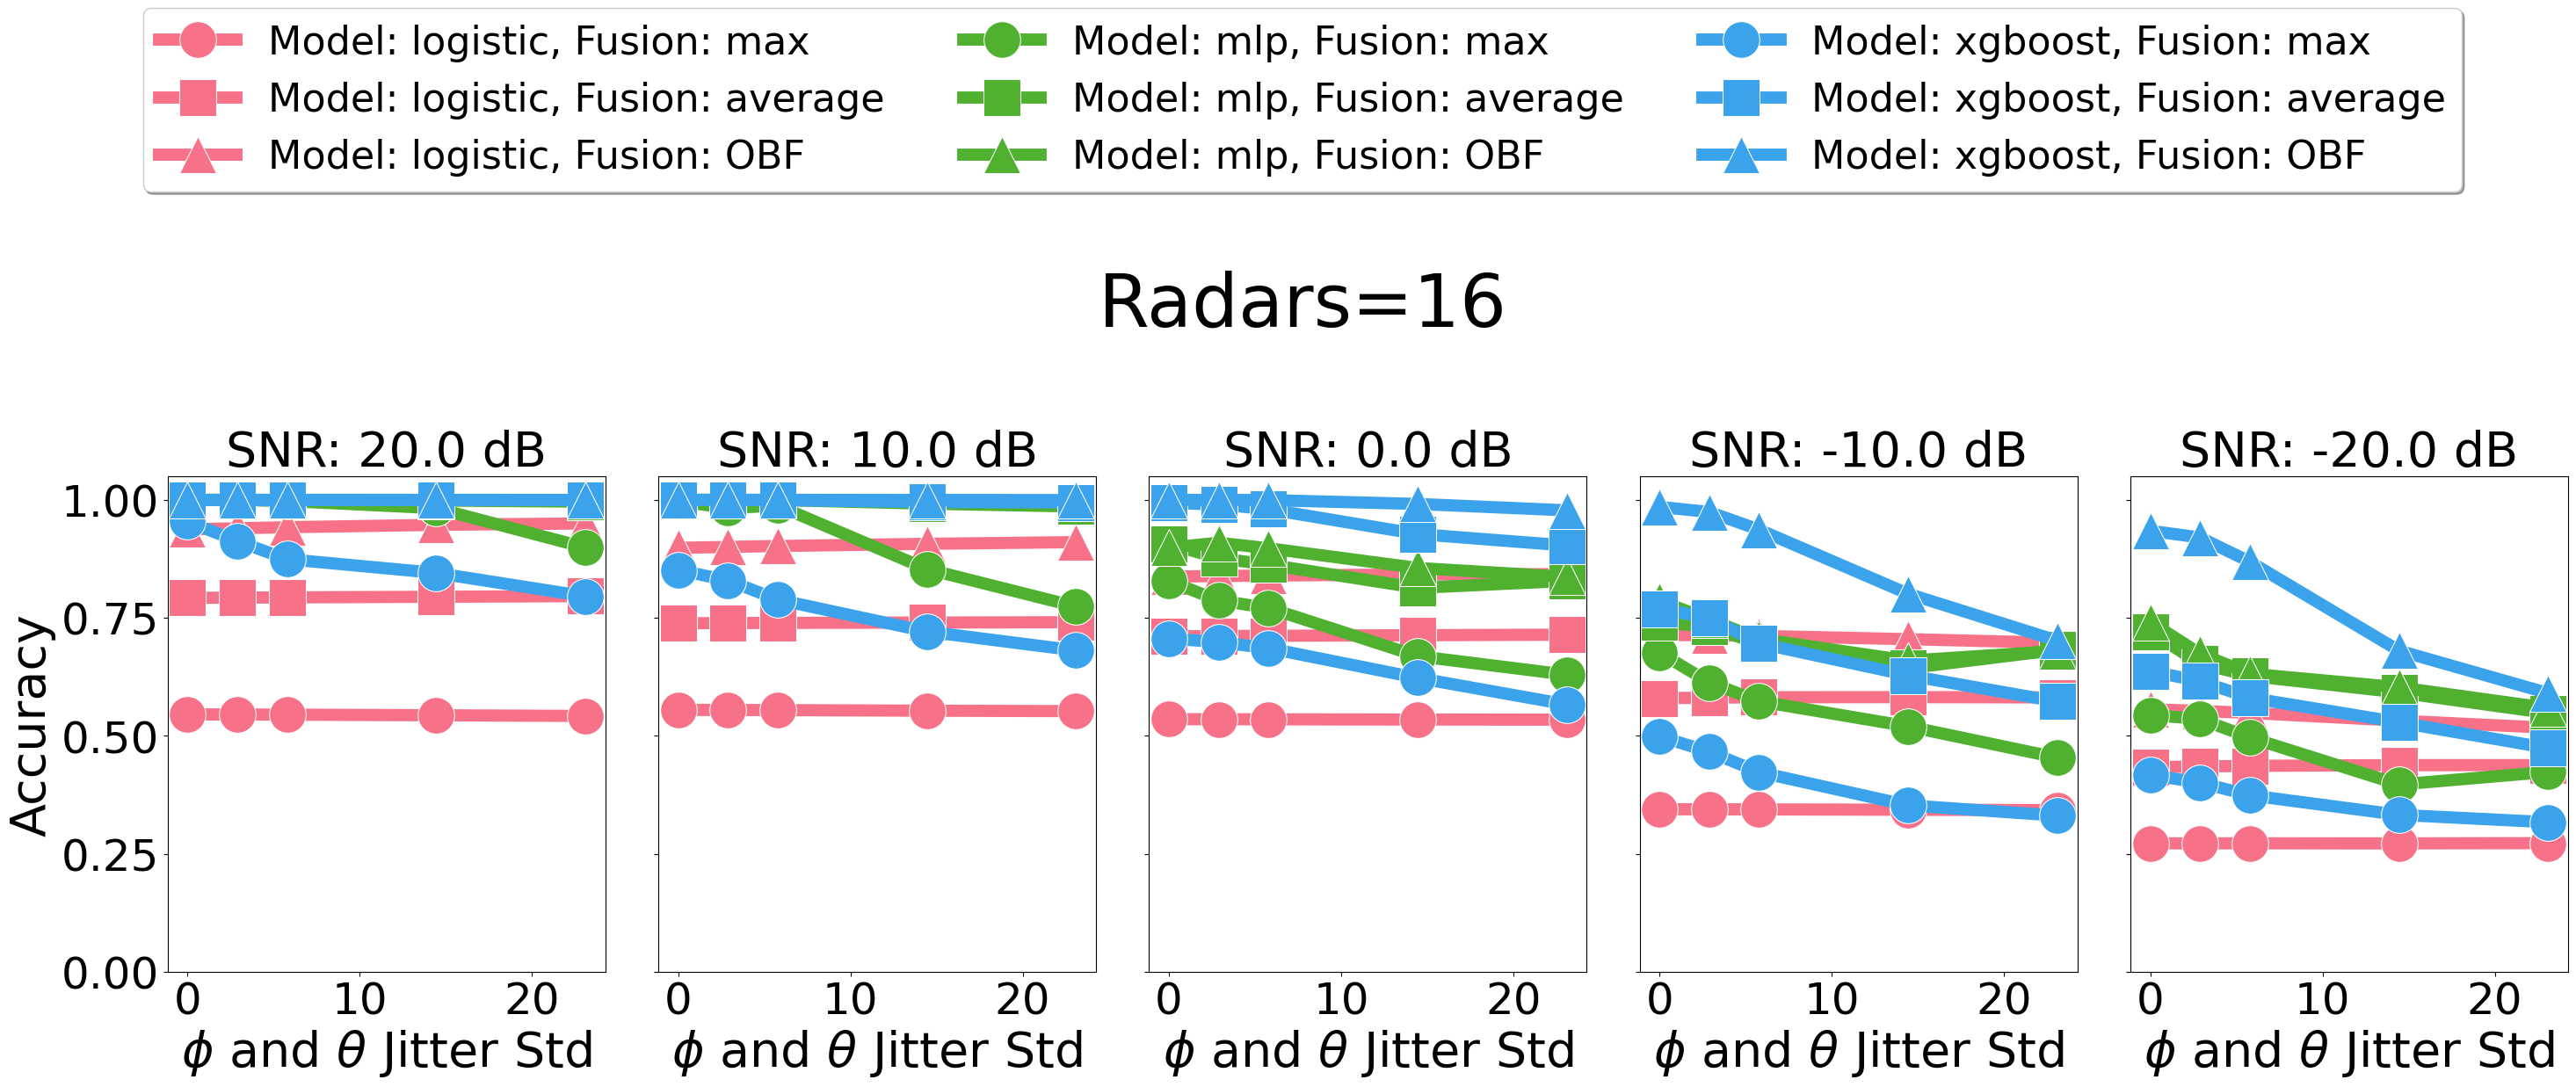

In [9]:
# Create subplots for each SNR_constraint
unique_constraints = np.sort(filtered_data['SNR_constraint'].unique())[::-1]
unique_models = filtered_data['model_choice'].unique()
unique_fusion_methods = ["max","average","OBF"]

SMALL_SIZE = 40
plt.rc('xtick', labelsize=SMALL_SIZE*0.9)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE*0.9)  
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE) 


# fig, axes = plt.subplots(len(unique_constraints), 1, figsize=(7.5, 30))
fig, axes = plt.subplots( 1,len(unique_constraints), figsize=(30,10),sharey=True)


markers = ['o', 's', '^', 'v', 'D']  # Different markers for fusion methods
marker_dict = {fusion_method: marker for fusion_method, marker in zip(unique_fusion_methods, markers)}

colors = sns.color_palette("husl", len(unique_models))  # Different colors for models
color_dict = {model: color for model, color in zip(unique_models, colors)}

for i, constraint in enumerate(unique_constraints):
    ax = axes[i]
    for model in unique_models:
        model_color = color_dict[model]
        for fusion_method in unique_fusion_methods:
            data_subset = filtered_data[
                (filtered_data['model_choice'] == model) &
                (filtered_data['SNR_constraint'] == constraint) &
                (filtered_data['fusion_method'] == fusion_method)
            ]

            marker = marker_dict[fusion_method]
            line = sns.lineplot(
                data=data_subset,
                x=np.sqrt(data_subset['azimuth_jitter_width']**2 / 12),
                y='accuracy',
                label=f"Model: {model}, Fusion: {fusion_method}",
                marker=marker,
                color=model_color,
                ax=ax,
                legend=None,
                markersize=30,
                linewidth=10
            )
    
#     ax.set_xticklabels(ax.get_xticklabels(),rotation=45)    
#     ax.set_ylim([0.2,0.9])
    ax.set_title(f"SNR: {constraint} dB",fontsize=SMALL_SIZE)
    ax.set_xlabel('$\phi$ and $\\theta$ Jitter Std',fontsize=SMALL_SIZE)
    ax.set_ylabel('Accuracy',fontsize=SMALL_SIZE)
    ax.set_ylim([0,1.05])

# Get all unique labels for the legend
lines = [line for line in ax.get_lines()]
labels = [line.get_label() for line in lines]
# Create a single legend for the entire figure
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.3), fancybox=True, shadow=True, ncol=3,prop={'size':SMALL_SIZE*0.8})
fig.suptitle(f"Radars={N_radars}",fontsize=SMALL_SIZE*1.5)
plt.tight_layout(w_pad=1)
plt.savefig(os.path.join(save_folder,"fusion_method.pdf"),dpi=1600,bbox_inches="tight")
plt.show()

### accuracy curves for number of radars

In [10]:
Jitter_filter = 0
model = "xgboost"
filtered_data = df[
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000) &
    (df['model_choice'] == model) & 
    (df["elevation_jitter_width"] == Jitter_filter)
]

jitter_std = np.round(np.sqrt(Jitter_filter**2 / 12),2)

unique_constraints = filtered_data['SNR_constraint'].unique()
unique_models = filtered_data['model_choice'].unique()
unique_fusion_methods = ["max","average","OBF"] #filtered_data['fusion_method'].unique()
unique_radars = filtered_data["n_radars"].unique()[::-1]
unique_snr = filtered_data["SNR_constraint"].unique()[::-1]

In [11]:
SMALL_SIZE = 30
plt.rc('xtick', labelsize=SMALL_SIZE * 0.9)
plt.rc('ytick', labelsize=SMALL_SIZE * 0.9)
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=SMALL_SIZE)

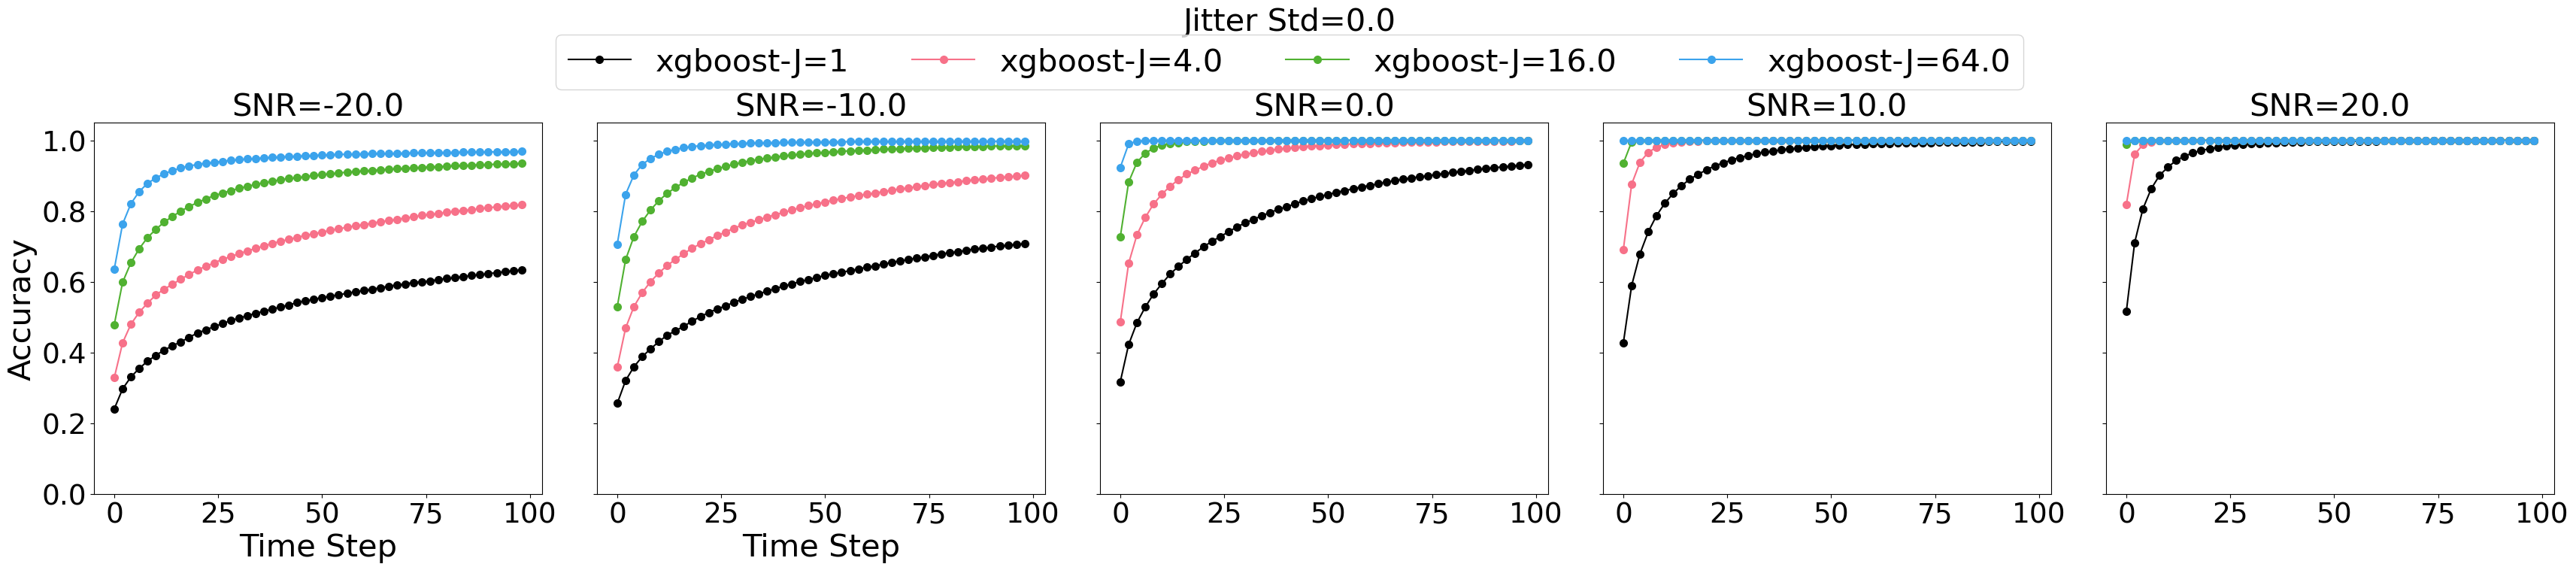

In [12]:
SNR_unique = filtered_data.SNR_constraint.unique()
Model_unique = filtered_data.model_choice.unique()
Fusion_method = ['max','average','OBF']

colors = sns.color_palette("husl", len(unique_radars))
color_dict = {radar:color for radar, color in zip(unique_radars, colors)}

colors = ["blue","purple","magenta"]
markers = ["d","s","o","2","+"]
legend = []
fig,axes = plt.subplots(1,len(unique_snr),sharey=True,figsize=(7*len(SNR_unique),8))
skip_every = 2
for i,SNR in enumerate(unique_snr):
    temp_df = filtered_data[(filtered_data.SNR_constraint==SNR) & (filtered_data.fusion_method=="OBF") & (filtered_data.n_radars==4)]
    acc_single = np.array(eval(temp_df.accuracy_single_time.item()))
    axes[i].plot(np.arange(0,len(acc_single),skip_every),acc_single[::skip_every],marker='o',markersize=7,color="k")
    if i == 0:
        legend.append(f"{model}-J={1}")
        
    for j,n_radar in enumerate(unique_radars):

        temp_df = filtered_data[(filtered_data.SNR_constraint==SNR) & (filtered_data.fusion_method=="OBF") & (filtered_data.n_radars==n_radar)]
        acc_single = np.array(eval(temp_df.accuracy_single_time.item()))
#         print(acc_single[-1])
        acc_fused = np.array(eval(temp_df.accuracy_time.item()))
        axes[i].plot(np.arange(0,len(acc_fused),skip_every),acc_fused[::skip_every],marker='o',markersize=7,color=color_dict[n_radar])
        axes[i].set_title(f"SNR={SNR}",fontsize=SMALL_SIZE)

        if i == 0:
            legend.append(f"{model}-J={n_radar}")
    



jitter_std = np.round(np.sqrt((Jitter_filter)**2 / 12))

axes[0].set_xlabel("Time Step")
axes[1].set_xlabel("Time Step")
axes[0].set_ylim([0,1.05])
axes[1].set_ylim([0,1.05])
axes[0].set_ylabel("Accuracy")
# axes[0].set_title(f"{N_radars} Radars, No $(\\theta,\phi)$",fontsize=20)
# axes[1].set_title(f"Single Radar, No $(\\theta,\phi)$",fontsize=20)
fig.suptitle(f"Jitter Std={jitter_std}",fontsize=SMALL_SIZE)
fig.legend(legend,loc='upper center', bbox_to_anchor=(.5, 0.96),fontsize=SMALL_SIZE, ncol=len(unique_radars)+1)
plt.tight_layout()

plt.savefig(os.path.join(save_folder,"accuracy_curves_vs_radar_snr.pdf"),dpi=1600,bbox_inches="tight")
plt.show()

## Acc vs SNR

In [13]:
SMALL_SIZE = 40
plt.rc('xtick', labelsize=SMALL_SIZE * 1.5)
plt.rc('ytick', labelsize=SMALL_SIZE * 1.5)
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=SMALL_SIZE)

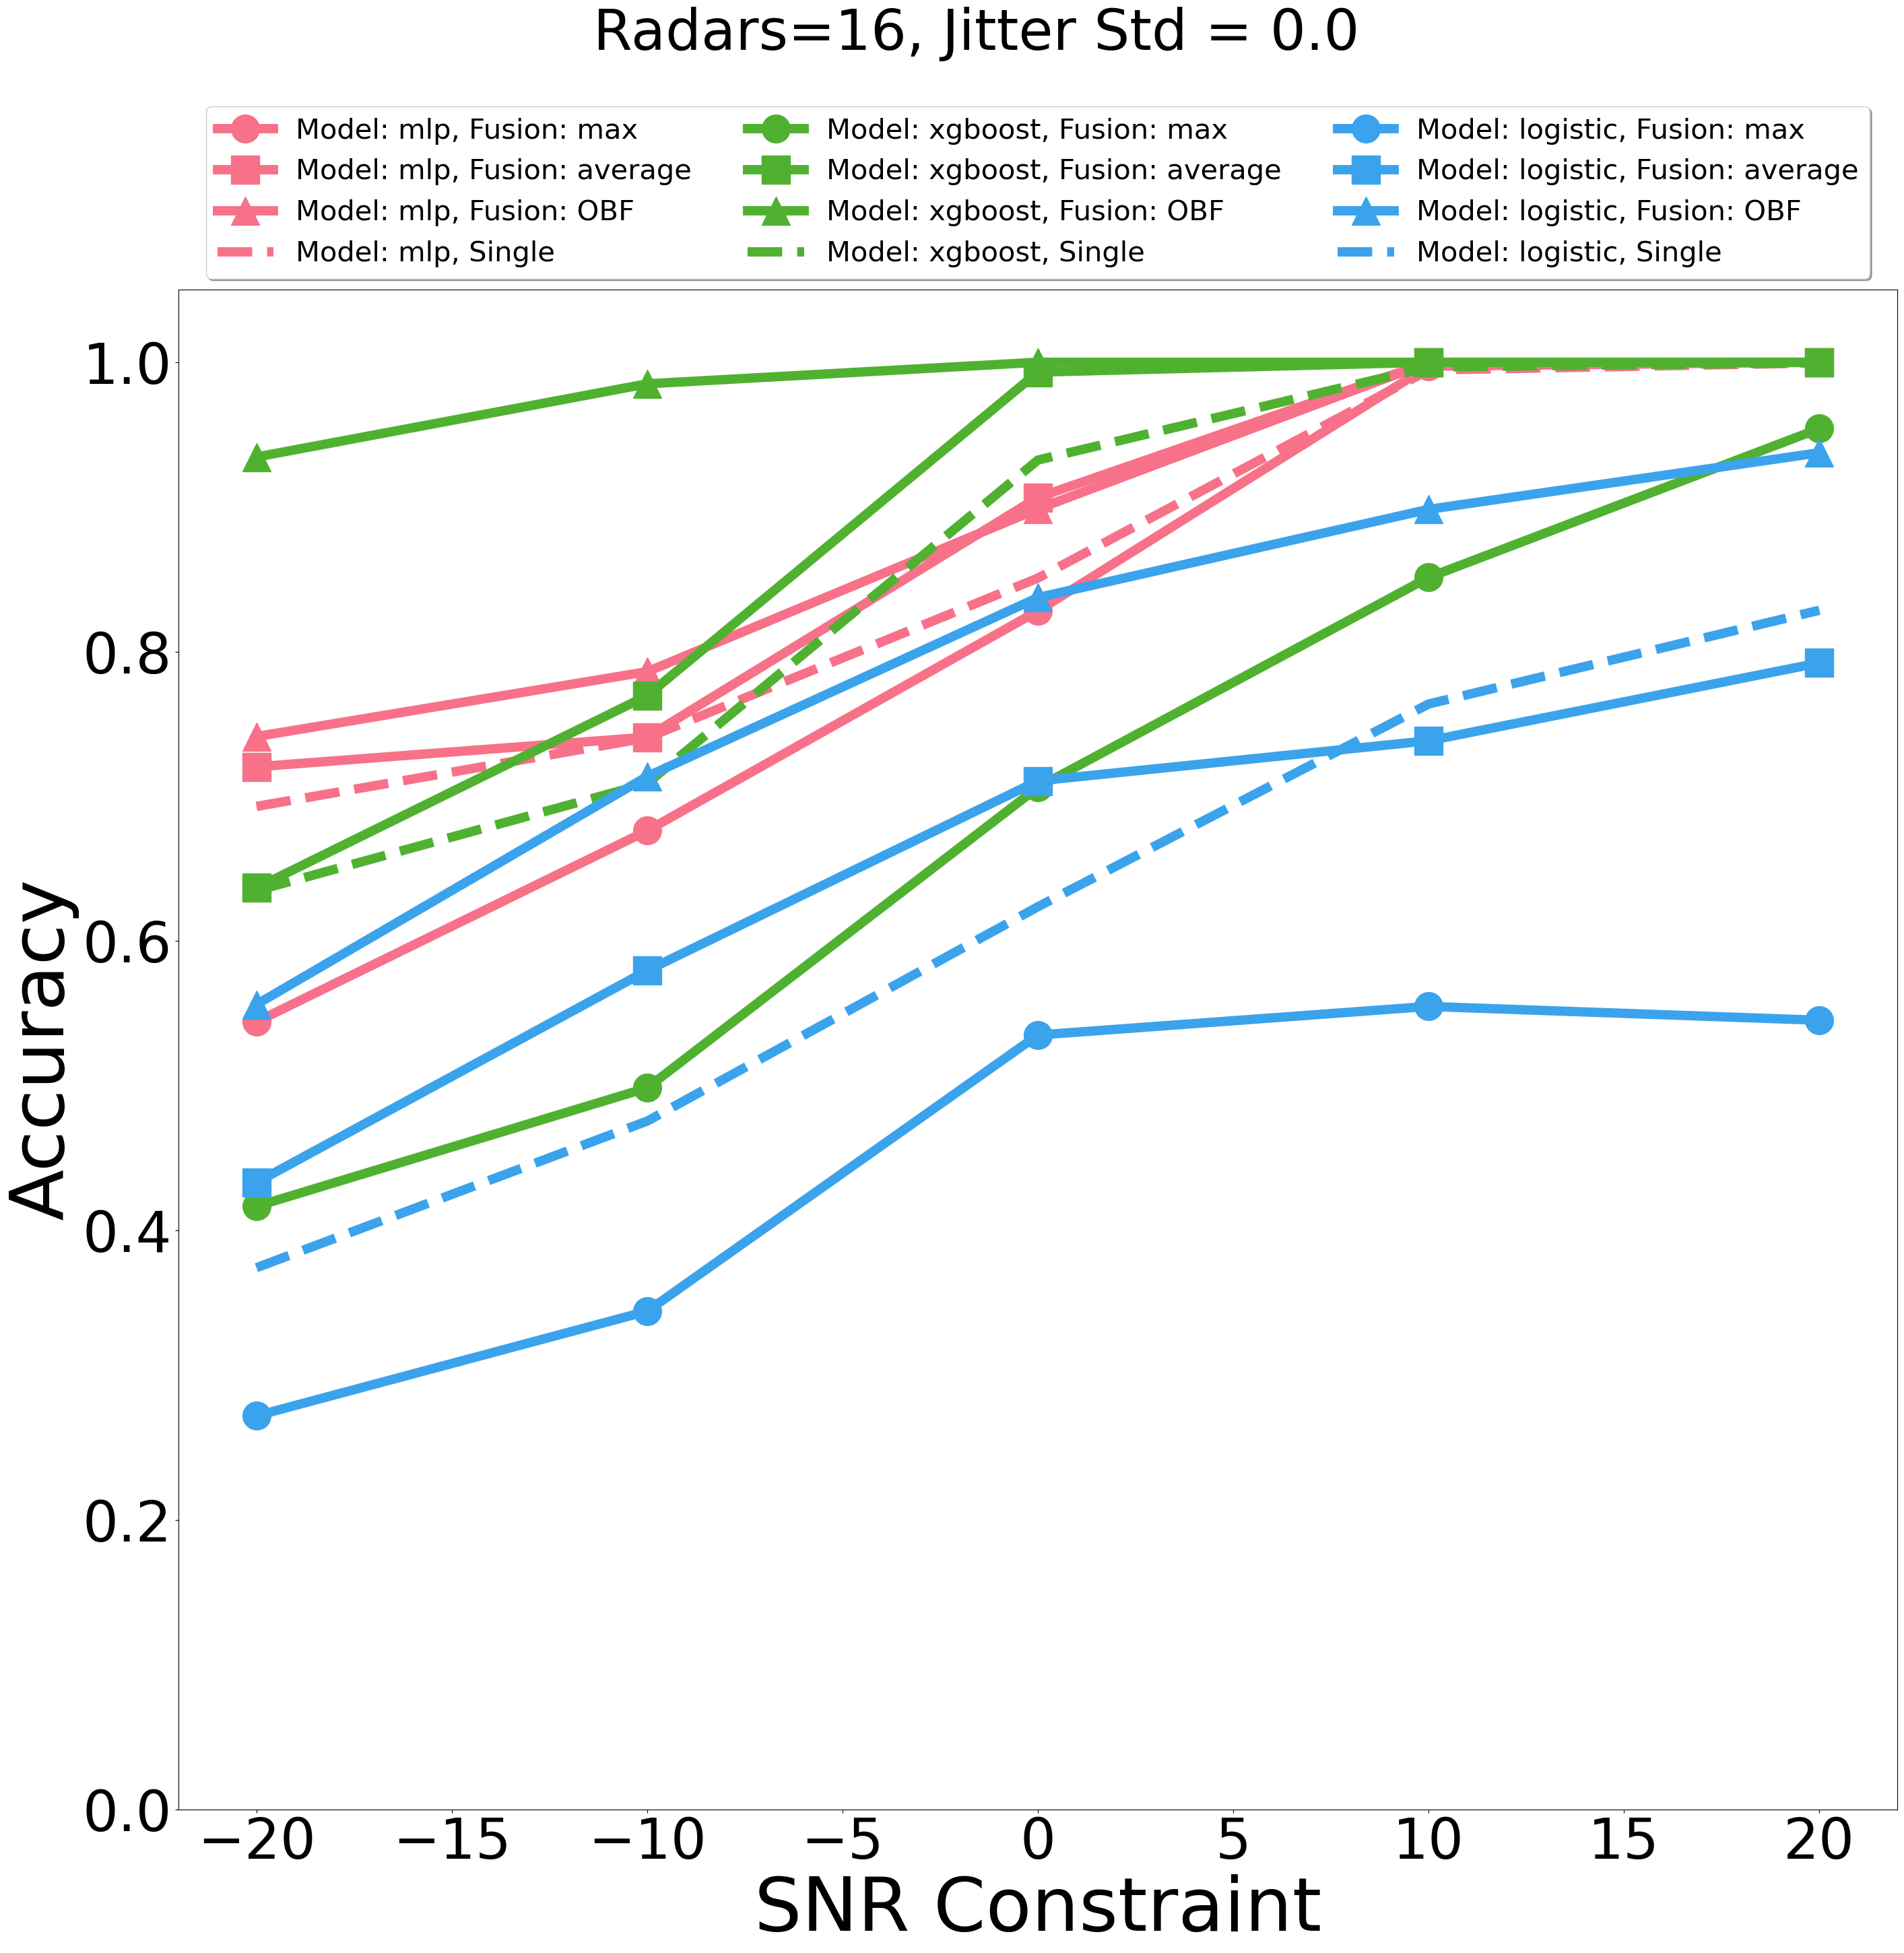

In [14]:
Jitter_filter = 0
N_radars = 16
filtered_data = df[
    (df['n_radars'] == N_radars) &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000) &
    ~(df['model_choice'] == "knn") & 
    (df["elevation_jitter_width"] == Jitter_filter)
]

unique_constraints = filtered_data['SNR_constraint'].unique()
unique_models = filtered_data['model_choice'].unique()
unique_fusion_methods = ["max","average","OBF"] #filtered_data['fusion_method'].unique()


fig, ax = plt.subplots(figsize=(30, 30))
# ax.set_aspect('equal')


markers = ['o', 's', '^', 'v', 'D']
marker_dict = {fusion_method: marker for fusion_method, marker in zip(unique_fusion_methods, markers)}

colors = sns.color_palette("husl", len(unique_models))
color_dict = {model: color for model, color in zip(unique_models, colors)}

for model in unique_models:
    model_color = color_dict[model]
    for fusion_method in unique_fusion_methods:
        data_subset = filtered_data[
            (filtered_data['model_choice'] == model) &
            (filtered_data['fusion_method'] == fusion_method)
        ]
        
        data_subset = data_subset.sort_values(by="SNR_constraint")
        
        marker = marker_dict[fusion_method]
        ax.plot(
            data_subset['SNR_constraint'],  # Change x-axis to SNR
            data_subset['accuracy'],
            label=f"Model: {model}, Fusion: {fusion_method}",
            marker=marker,
            color=model_color,
            markersize=30,
            linewidth=10
        )
        
    ax.plot(
        data_subset['SNR_constraint'],  # Change x-axis to SNR
        data_subset['accuracy_single'],
        label=f"Model: {model}, Single",
        marker=None,
        color=model_color,
        markersize=30,
        linewidth=10,
        linestyle="--"
    )

ax.set_xlabel('SNR Constraint', fontsize=SMALL_SIZE*2)
ax.set_ylabel('Accuracy', fontsize=SMALL_SIZE*2)
ax.set_ylim([0,1.05])

# legend.append("Single Radar")
jitter_std = np.round(np.sqrt((Jitter_filter)**2 / 12))

fig.suptitle(f"Radars={N_radars}, Jitter Std = {jitter_std}",fontsize=SMALL_SIZE*1.5)

# Display the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13), fancybox=True, shadow=True, ncol=3, prop={'size': SMALL_SIZE*0.75})
plt.tight_layout()
plt.savefig(os.path.join(save_folder,"accuracy_vs_snr.pdf"),dpi=1600,bbox_inches="tight")
plt.show()

## Accuracy vs time step for multiple SNR

In [15]:
N_radars = 16
Jitter_filter = 0

fig.suptitle(f"Radars={N_radars}, Jitter Std = {jitter_std}",fontsize=SMALL_SIZE*2)
filtered_data = df[
    (df['n_radars'] == N_radars) &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000) &
    ~(df['model_choice'] == "knn") & 
    (df["elevation_jitter_width"] == Jitter_filter)
]

In [16]:
SMALL_SIZE = 15
plt.rc('xtick', labelsize=SMALL_SIZE * 1)
plt.rc('ytick', labelsize=SMALL_SIZE * 1.)
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=SMALL_SIZE)

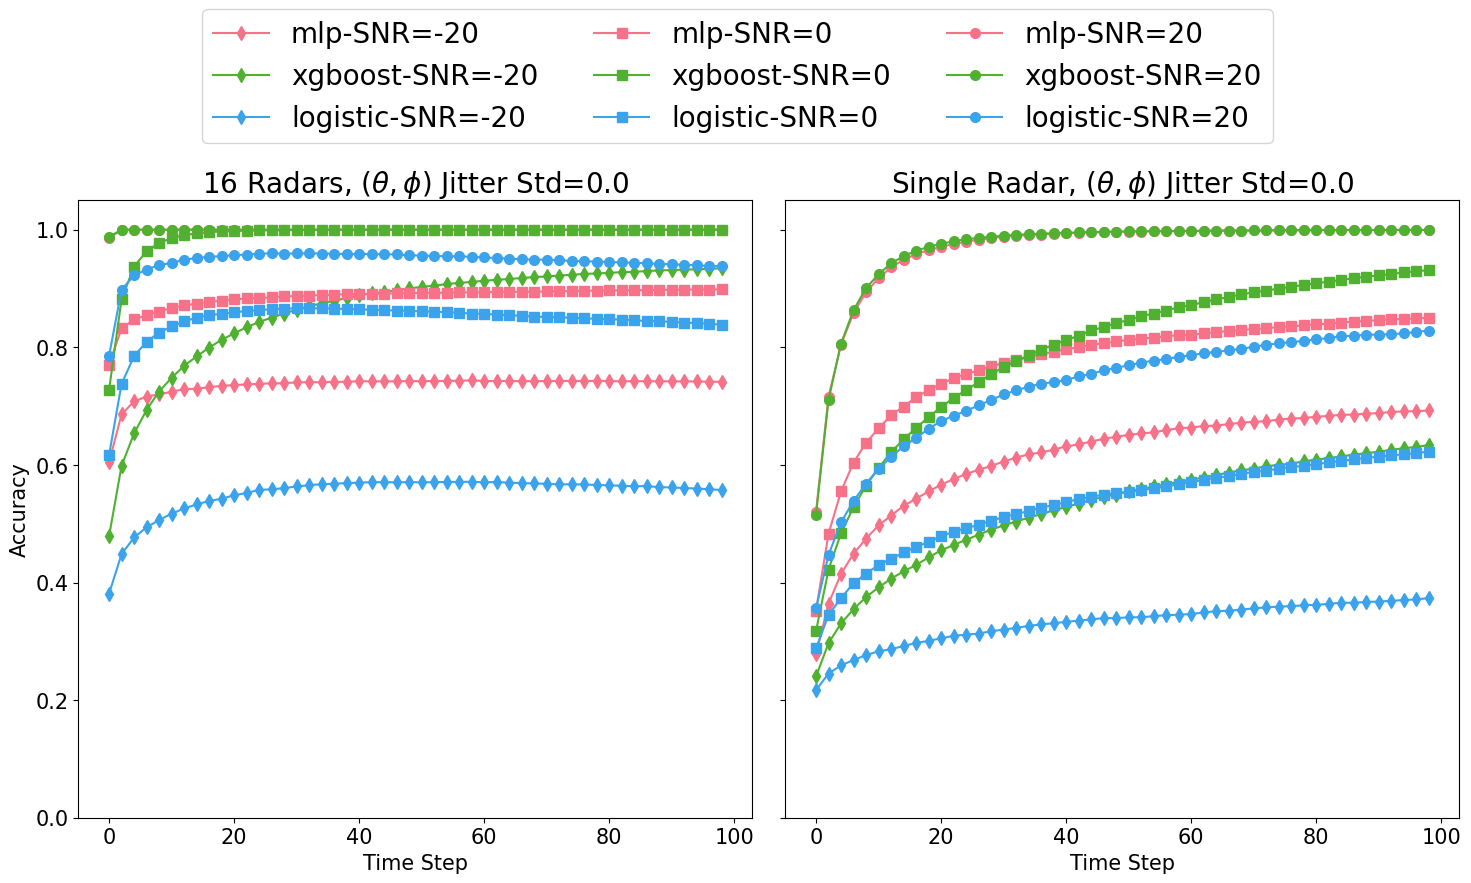

In [17]:
SNR_unique = filtered_data.SNR_constraint.unique()
Model_unique = filtered_data.model_choice.unique()
Fusion_method = ['max','average','OBF']
fusion_choice = "OBF"
colors = sns.color_palette("husl", len(Model_unique))
color_dict = {model: color for model, color in zip(Model_unique, colors)}

SNR_unique = [-20,0,20]
colors = ["blue","purple","magenta"]
markers = ["d","s","o","2","+"]
legend = []
fig,axes = plt.subplots(1,2,sharey=True,figsize=(15,7.5))
skip_every = 2
for i,SNR in enumerate(SNR_unique):
    for j,model in enumerate(Model_unique):
        temp_df = filtered_data[(filtered_data.SNR_constraint==SNR) & (filtered_data.model_choice==model) & (filtered_data.fusion_method==fusion_choice)]
        acc_single = np.array(eval(temp_df.accuracy_single_time.item()))
        acc_fused = np.array(eval(temp_df.accuracy_time.item()))
        
        axes[0].plot(np.arange(0,len(acc_fused),skip_every),acc_fused[::skip_every],marker=markers[i],markersize=7,color=color_dict[model])
        axes[1].plot(np.arange(0,len(acc_fused),skip_every),acc_single[::skip_every],marker=markers[i],markersize=7,color=color_dict[model])
        legend.append(f"{model}-SNR={SNR}")

jitter_std = np.round(np.sqrt((Jitter_filter)**2 / 12))

axes[0].set_xlabel("Time Step")
axes[1].set_xlabel("Time Step")
axes[0].set_ylim([0,1.05])
axes[1].set_ylim([0,1.05])
axes[0].set_ylabel("Accuracy")
axes[0].set_title(f"{N_radars} Radars, $(\\theta,\phi)$ Jitter Std={jitter_std}",fontsize=20)
axes[1].set_title(f"Single Radar, $(\\theta,\phi)$ Jitter Std={jitter_std}",fontsize=20)
# axes[0].set_title(f"{N_radars} Radars, No $(\\theta,\phi)$",fontsize=20)
# axes[1].set_title(f"Single Radar, No $(\\theta,\phi)$",fontsize=20)

fig.legend(legend,loc='upper center', bbox_to_anchor=(.5, 1.2),fontsize=20, ncol=len(Model_unique))
plt.tight_layout()

plt.savefig(os.path.join(save_folder,"accuracy_vs_snr_multi_vs_single.pdf"),dpi=1600,bbox_inches="tight")
plt.show()

## Acc vs Fusion Method

In [18]:
N_radars = 16
Jitter_filter = 80.
filtered_data = df[
    (df['n_radars'] == N_radars) &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000) &
    ~(df['model_choice'] == "knn") & 
    (df["elevation_jitter_width"] == Jitter_filter)
]

In [19]:
SMALL_SIZE = 70
plt.rc('xtick', labelsize=SMALL_SIZE * 1)
plt.rc('ytick', labelsize=SMALL_SIZE * 1.)
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=SMALL_SIZE)

In [20]:
len(SNR_unique)

3

In [21]:
SNR_unique = sorted(filtered_data.SNR_constraint.unique())[::-1]
Model_unique = filtered_data.model_choice.unique()
Fusion_method = ['max','average','OBF']

colors = sns.color_palette("husl", len(Model_unique))
color_dict = {fuse: color for fuse, color in zip(Fusion_method, colors)}

markers = ["d","s","o","2","+"]
legend = []
fig,axes = plt.subplots(len(SNR_unique),len(Model_unique),figsize=(len(Model_unique)*20,len(SNR_unique)*20),sharey=True)
skip_every = 2

for k,snr in enumerate(SNR_unique):
    for i,model in enumerate(Model_unique):
        for j,fusion_method in enumerate(Fusion_method):
            temp_df = filtered_data[(filtered_data.SNR_constraint==snr) & (filtered_data.model_choice==model) & (filtered_data.fusion_method==fusion_method)]
            acc_fused = np.array(eval(temp_df.accuracy_time.item()))
            acc_single = np.array(eval(temp_df.accuracy_single_time.item()))

            axes[k,i].plot(np.arange(0,len(acc_fused),skip_every),acc_fused[::skip_every],marker=markers[j],markersize=30,color=color_dict[fusion_method],linewidth=10)
            axes[k,i].set_title(f"{model}",fontsize=SMALL_SIZE*1.5)

            if (k == 0) and (i==0):
                legend.append(f"{fusion_method}")
            
            if (j==0) and (i == 0):
                axes[k,i].set_ylabel(f"SNR={snr}\n Accuracy")
        
                
        axes[k,i].plot(np.arange(0,len(acc_fused),skip_every),acc_single[::skip_every],marker=".",markersize=30,color="k",linewidth=10)
        axes[k,i].set_xlabel("time step")
        axes[k,i].set_ylim([0,1.05])
        
legend.append("Single Radar")
jitter_std = np.round(np.sqrt((Jitter_filter)**2 / 12))

fig.legend(legend,loc='upper center', bbox_to_anchor=(.5, 1.03),fontsize=SMALL_SIZE*1.5, ncol=len(Model_unique)+1)
fig.suptitle(f"Radars={N_radars}, $(\\theta,\phi)$ Jitter Std = {jitter_std}",fontsize=SMALL_SIZE*2)
plt.tight_layout()
plt.savefig(os.path.join(save_folder,"accuracy_vs_snr_multi.pdf"),dpi=1600,bbox_inches="tight")
plt.show()

## Number of radars vs accuracy

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [23]:
SMALL_SIZE = 200
plt.rc('xtick', labelsize=SMALL_SIZE * 1)
plt.rc('ytick', labelsize=SMALL_SIZE * 1.0)
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=SMALL_SIZE)

In [24]:
# Assuming 'df' is your DataFrame containing the data

# Filtering the DataFrame based on the given conditions
jitter_filter = 80
fusion_choice = "OBF"
filtered_data = df[
    (df['fusion_method'] == fusion_choice) &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000) &
    (df["elevation_jitter_width"] == jitter_filter)
]

# Set the index to 'model_choice' and 'n_radars'
filtered_data.set_index(['model_choice', 'n_radars'], inplace=True)

# Get unique SNR_constraint values
unique_snr_values = sorted(filtered_data['SNR_constraint'].unique())

# Assign unique colors to each model
models = filtered_data.index.get_level_values('model_choice').unique()

colors = sns.color_palette("husl", len(models))
color_dict = {model: color for model, color in zip(models, colors)}

markers = ["d","s","o","2","+"]

fig, axs = plt.subplots(1,len(unique_snr_values), figsize=(60*len(unique_snr_values), 60))

legend_dict = {}  # Dictionary to store unique legend items

for i, snr_value in enumerate(unique_snr_values):
    snr_filtered_data = filtered_data[filtered_data['SNR_constraint'] == snr_value]

    # Plotting number of radars vs. accuracy for each model
    ax = axs[i]
    for model in sorted(models):  # Sort models alphabetically
        model_data = snr_filtered_data.loc[model]
        model_data = model_data.sort_values('n_radars')  # Sort by number of radars
        color = color_dict[model]

        line1 = ax.plot([1] + model_data.index.astype(int).tolist(), [model_data['accuracy_single'].mean()] + model_data['accuracy'].tolist(), marker='o', linestyle='-', label=f'{model} - accuracy', color=color,linewidth=SMALL_SIZE/3,markersize=SMALL_SIZE*0.9)
#         line2 = ax.plot(model_data.index, model_data['accuracy_single'], marker='o', linestyle='--', label=f'{model} - accuracy_single', color=color,linewidth=SMALL_SIZE/3,markersize=SMALL_SIZE/3)

        # Collect unique legend items
        if f'{model} - accuracy' not in legend_dict:
            legend_dict[f'{model} - accuracy'] = line1[0]

    ax.set_xlabel('Number of Radars',fontsize=SMALL_SIZE)
    ax.set_ylabel('Accuracy',fontsize=SMALL_SIZE)
    ax.set_title(f'(SNR Constraint: {snr_value})',fontsize=SMALL_SIZE)
    ax.grid(True,linewidth=SMALL_SIZE/5)
    ax.set_xscale("log")
    ax.set_ylim(0, 1.05)  # Set y-axis limits

jitter_std = np.round(np.sqrt((jitter_filter)**2 / 12))
fig.suptitle(f"Accuracy vs Number of Radars: $(\\theta,\phi)$ Jitter Std={jitter_std}",fontsize=SMALL_SIZE)
# Create a single legend at the top of the figure using unique legend items
fig.legend(legend_dict.values(), legend_dict.keys(), loc='upper center', bbox_to_anchor=(0.5, 0.96), ncol=len(models),fontsize=SMALL_SIZE*0.96)
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust subplot layout
plt.savefig(os.path.join(save_folder,"accuracy_vs_num_radars.pdf"),dpi=1600,bbox_inches="tight")
plt.show()

## Results table

In [35]:
Jitter_filter = 0
N_radars = 16
filtered_data = df[
    (df['n_radars'] == N_radars) &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000) &
    ~(df['model_choice'] == "knn") & 
    (df["elevation_jitter_width"] == Jitter_filter)
]


In [36]:
latex_df = filtered_data.groupby(["SNR_constraint","fusion_method","model_choice"])[["accuracy"]].mean()
print(latex_df.unstack().unstack())
latex_df.index.names = ["SNR","Fusion Method","ML Model"]
latex_df = latex_df.unstack().unstack().reindex(level=2,columns=["max","average","OBF"]).sort_values(by="SNR",ascending=False)
latex_df

                accuracy                                                    \
model_choice    logistic                           mlp                       
fusion_method        OBF   average       max       OBF   average       max   
SNR_constraint                                                               
-20.0           0.546657  0.435043  0.272521  0.517486  0.412229  0.325043   
-10.0           0.701057  0.575229  0.342979  0.621429  0.535450  0.380586   
 0.0            0.827421  0.709343  0.534207  0.793407  0.788143  0.484829   
 10.0           0.887943  0.740229  0.551814  0.925479  0.930336  0.560221   
 20.0           0.922029  0.801693  0.540286  0.998750  0.973093  0.642993   

                                              
model_choice     xgboost                      
fusion_method        OBF   average       max  
SNR_constraint                                
-20.0           0.552707  0.394279  0.286521  
-10.0           0.656100  0.487429  0.311886  
 0.0           

accuracy                                                    \
ML Model       logistic                           mlp                       
Fusion Method       max   average       OBF       max   average       OBF   
SNR                                                                         
 20.0          0.540286  0.801693  0.922029  0.642993  0.973093  0.998750   
 10.0          0.551814  0.740229  0.887943  0.560221  0.930336  0.925479   
 0.0           0.534207  0.709343  0.827421  0.484829  0.788143  0.793407   
-10.0          0.342979  0.575229  0.701057  0.380586  0.535450  0.621429   
-20.0          0.272521  0.435043  0.546657  0.325043  0.412229  0.517486   

                                             
ML Model        xgboost                      
Fusion Method       max   average       OBF  
SNR                                          
 20.0          0.628564  0.959614  0.999750  
 10.0          0.579500  0.920900  0.995529  
 0.0           0.526436  0.812143  0.913964  
-10.0          0.311886  0.487429  0.656100  
-20.0          0.286521  0.394279  0.552707

In [37]:
single_latex_df = filtered_data.groupby(["SNR_constraint","fusion_method","model_choice"])[["accuracy_single"]].mean()
print(single_latex_df.unstack().unstack())
single_latex_df.index.names = ["SNR","Fusion Method","ML Model"]
single_latex_df = single_latex_df.unstack().unstack().reindex(level=2,columns=["max","average","OBF"]).sort_values(by="SNR",ascending=False)
single_latex_df = single_latex_df.rename(columns={"max":"single","average":"single","fusion":"single"},level=2).T.drop_duplicates().T.rename(columns={"accuracy_single":"accuracy"},level=0)
single_latex_df

               accuracy_single                                          \
model_choice          logistic                           mlp             
fusion_method              OBF   average       max       OBF   average   
SNR_constraint                                                           
-20.0                 0.369164  0.369164  0.369164  0.438593  0.438593   
-10.0                 0.468221  0.468221  0.468221  0.503664  0.503664   
 0.0                  0.616607  0.616607  0.616607  0.687114  0.687114   
 10.0                 0.756964  0.756964  0.756964  0.875114  0.875114   
 20.0                 0.821129  0.821129  0.821129  0.947129  0.947129   

                                                        
model_choice               xgboost                      
fusion_method        max       OBF   average       max  
SNR_constraint                                          
-20.0           0.438593  0.407486  0.407486  0.407486  
-10.0           0.503664  0.455193  0.455193  0.

accuracy                    
ML Model       logistic       mlp   xgboost
Fusion Method    single    single    single
SNR                                        
 20.0          0.821129  0.947129  0.954186
 10.0          0.756964  0.875114  0.884179
 0.0           0.616607  0.687114  0.666479
-10.0          0.468221  0.503664  0.455193
-20.0          0.369164  0.438593  0.407486

In [38]:
final_latex_df = pd.concat((single_latex_df,latex_df),axis=1).sort_values(axis=1,by="ML Model")
final_latex_df = final_latex_df.applymap(lambda x: np.round(x,3))
final_latex_df

accuracy                                                     \
ML Model      logistic                          mlp                         
Fusion Method   single    max average    OBF single    max average    OBF   
SNR                                                                         
 20.0            0.821  0.540   0.802  0.922  0.947  0.643   0.973  0.999   
 10.0            0.757  0.552   0.740  0.888  0.875  0.560   0.930  0.925   
 0.0             0.617  0.534   0.709  0.827  0.687  0.485   0.788  0.793   
-10.0            0.468  0.343   0.575  0.701  0.504  0.381   0.535  0.621   
-20.0            0.369  0.273   0.435  0.547  0.439  0.325   0.412  0.517   

                                             
ML Model      xgboost                        
Fusion Method  single    max average    OBF  
SNR                                          
 20.0           0.954  0.629   0.960  1.000  
 10.0           0.884  0.580   0.921  0.996  
 0.0            0.666  0.526   0.812  0.914  
-10.0           0.455  0.312   0.487  0.656  
-20.0           0.407  0.287   0.394  0.553

In [39]:
latex_str = final_latex_df.to_latex(multicolumn_format="c",index=True)
print(latex_str)

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} & \multicolumn{12}{c}{accuracy} \\
ML Model & \multicolumn{4}{c}{logistic} & \multicolumn{4}{c}{mlp} & \multicolumn{4}{c}{xgboost} \\
Fusion Method &   single &    max & average &    OBF & single &    max & average &    OBF &  single &    max & average &    OBF \\
SNR   &          &        &         &        &        &        &         &        &         &        &         &        \\
\midrule
 20.0 &    0.821 &  0.540 &   0.802 &  0.922 &  0.947 &  0.643 &   0.973 &  0.999 &   0.954 &  0.629 &   0.960 &  1.000 \\
 10.0 &    0.757 &  0.552 &   0.740 &  0.888 &  0.875 &  0.560 &   0.930 &  0.925 &   0.884 &  0.580 &   0.921 &  0.996 \\
 0.0  &    0.617 &  0.534 &   0.709 &  0.827 &  0.687 &  0.485 &   0.788 &  0.793 &   0.666 &  0.526 &   0.812 &  0.914 \\
-10.0 &    0.468 &  0.343 &   0.575 &  0.701 &  0.504 &  0.381 &   0.535 &  0.621 &   0.455 &  0.312 &   0.487 &  0.656 \\
-20.0 &    0.369 &  0.273 &   0.435 &  0.547 &  0.439 &  0.325 &   0

C:\Users\lpott\AppData\Local\Temp\ipykernel_86492\3516066900.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_str = final_latex_df.to_latex(multicolumn_format="c",index=True)
